# Experiment: UV-Vis titration
Test compound (arachadonic acid at 10 mM in DMSO) titrated into cuvette containing [**P450 BM3**](https://www.ncbi.nlm.nih.gov/pubmed/12076537) wild type (just heme domain). UV-vis absorbance from 200-800 nm measured at every incrament.  **Backround:** The spin potential of the active site heme iron changes as compounds bind there, resulting in a shift absorbance. The magnitude of the shift in response to ```[substrate]``` can be quantified and used to calculate the ```kd``` - dissosciation constant between the enzyme and substrate using [**Michaelis-Menten kinetics**](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics) - even though not reactions take place.

# Examples:
### Overlayed spectra
The [**Soret**](https://en.wikipedia.org/wiki/Soret_peak) peak at 420 nm collapses and a new peak at 390 nm rises as ```[substrate]``` increases.  

![](tutorial-data/titrations/Tirtrations-arachadonic-acid-5-traces.png)
### response
Subtract the trace at ```[substrate] == 0 ``` to isolate the response of the protein to the substrate, this can be useful to identify different types of shift.
![](tutorial-data/titrations/Tirtrations-arachadonic-acid-5-diff-traces.png)

### Response * ```[substrate]```
Response is calculated as $ |\Delta A_{390}| + |\Delta A_{420}|$ at each concentration. The Michaelis-Menten equation: $v = \frac {v_{max} \times [substrate]}{k_m + [substrate]}$ is used to describe the binding. $[substrate]$ is known at each step, $v$ is the response and $v_{max}$ and $k_m$ are unknown variables that are determined during the curve-fitting process.


![](tutorial-data/titrations/Tirtrations-arachadonic-acid-5-michaelis-menten.png)

# data description
The data is in a ```csv``` file generate by the Varian UV-Vis spectrometer which contains:
* Wavelength (nm) - duplicated in every measurement
* Sample absorbance at each wavelength
* User-input sample names - contain vol ```substrate``` added
* Information about the machine at the foot of the file

# aim:
* create dataframe from ```csv``` fie
* ✂ Remove unnecessary information ✂
* Plot traces - with substrate concentration labels
* Extract sample information, calculate ```[substrate]```
* Measure response at each ```[substrate]```, fit Michaelis-Menten curve - find ```kd``` and ```vmax```
# contents
1. 🐼 Using ```pandas``` to create a data frame from a ```csv``` file, cleaning data ✂️
2. 📈 Plotting traces, and the change relative to substrate-free trace 
3. 📝 Using regex to extract compound vols from the user input data 
4. 📏 Quantifying the response and curve fitting - Michaelis Menten

# 1. ```pandas```
The [**pandas**](https://pandas.pydata.org/pandas-docs/stable/) library is a toolbox for tabular data, e.g. ```csv, xlsx```.  In this case ```pandas.read_csv``` is used to create a ```DataFrame``` - an object that contains the data and functions for manipulating it. Throughout **secion 1** the ```DataFrame``` object will be manipulated to select the information of interest.

```pandas``` is indispensible in most of my data analysis tasks. For a detailed overview, look at Jake Vaan der Plaas' [**Chapter on pandas**](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html) in the [**Python Data Science Handbook (free e-book)
**](https://jakevdp.github.io/PythonDataScienceHandbook/).

The core object of the ```pandas``` library is the ```DataFrame``` - a 2D table (also, the ```Series``` - a single colum). The object can be used to work with large datasets very efficiently, and offers lots of functions that deal with filtering and locating data as well as mathmatical operations and even built-in plotting. 

## In this section
* A ```DataFrame``` called ```df``` is created from a ```csv``` file - a table containing all of the information in the ```csv```. Several **trim** operations ✂️ will be introduced to refine the data selection in ```df```
* **Exercise:** create a fuction that cleans the ```csv``` provided - removing trailing information, seting suitable column headers and index,removing duplicated columns and ensuring that ```df``` contains ```floats``` and ```ints``` where suitable, rather than ```strings``` of the numbers e.g. ```'3.24'```

In [1]:
import pandas as pd

# usually, pd.read_csv(filepath) e.g. pd.read_csv('/Tutorials/tutorial-data/titrations/20191128_ArachadonicaAcid_BM3WT_Titration_2.csv')
df = pd.read_csv('https://raw.githubusercontent.com/UoMMIB/Python-Club/master/Tutorials/tutorial-data/titrations/20191128_ArachadonicaAcid_BM3WT_Titration_5.csv')
df.head() # first 5 rows
#df.tail() # last 5 rows

,baseline,Unnamed: 1,bm3,Unnamed: 3,dmso_1.0,Unnamed: 5,dmso_2.0,Unnamed: 7,Arachadonic_Acid_0.5,Unnamed: 9,...,Unnamed: 29,Arachadonic_Acid_7.0,Unnamed: 31,Arachadonic_Acid_8.0,Unnamed: 33,Arachadonic_Acid_9.0,Unnamed: 35,Arachadonic_Acid_10.0,Unnamed: 37,Unnamed: 38
0,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,...,Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,Wavelength (nm),Abs,NaN
1,800.0281372,-0.0011736874,800.0281372,0.004030608572,800.0281372,0.008831423707,800.0281372,0.007053112611,800.0281372,0.01061017532,...,0.01727821678,800.0281372,0.02329324558,800.0281372,0.01436490566,800.0281372,0.01514357515,800.0281372,0.02037685178,NaN
2,799.0550537,-0.001497765072,799.0550537,-0.001620179624,799.0550537,0.00470665656,799.0550537,0.008085762151,799.0550537,0.01180121396,...,0.01784328371,799.0550537,0.02186906524,799.0550537,0.01349939313,799.0550537,0.02210245468,799.0550537,0.01814198866,NaN
3,797.9424438,-0.0003967541561,797.9424438,0.006097461563,797.9424438,0.005836805329,797.9424438,0.009304532781,797.9424438,0.009330874309,...,0.02014354616,797.9424438,0.0249022115,797.9424438,0.0145706581,797.9424438,0.02447737008,797.9424438,0.02553883754,NaN
4,796.9685059,0.0008994067321,796.9685059,0.004539579619,796.9685059,0.008844553493,796.9685059,0.009598055854,796.9685059,0.01237882394,...,0.0237238463,796.9685059,0.02120030671,796.9685059,0.01822167076,796.9685059,0.01573968679,796.9685059,0.028930353,NaN


# some attributes of```pd.DataFrame```

In [2]:
print(df.index)
print()
print(df.columns)
print()
print(df.values) # array-like 

RangeIndex(start=0, stop=1191, step=1)

Index(['baseline', 'Unnamed: 1', 'bm3', 'Unnamed: 3', 'dmso_1.0', 'Unnamed: 5',
       'dmso_2.0', 'Unnamed: 7', 'Arachadonic_Acid_0.5', 'Unnamed: 9',
       'Arachadonic_Acid_1.0', 'Unnamed: 11', 'Arachadonic_Acid_1.5',
       'Unnamed: 13', 'Arachadonic_Acid_2.0', 'Unnamed: 15',
       'Arachadonic_Acid_2.5', 'Unnamed: 17', 'Arachadonic_Acid_3.0',
       'Unnamed: 19', 'Arachadonic_Acid_3.5', 'Unnamed: 21',
       'Arachadonic_Acid_4.0', 'Unnamed: 23', 'Arachadonic_Acid_4.5',
       'Unnamed: 25', 'Arachadonic_Acid_5.0', 'Unnamed: 27',
       'Arachadonic_Acid_6.0', 'Unnamed: 29', 'Arachadonic_Acid_7.0',
       'Unnamed: 31', 'Arachadonic_Acid_8.0', 'Unnamed: 33',
       'Arachadonic_Acid_9.0', 'Unnamed: 35', 'Arachadonic_Acid_10.0',
       'Unnamed: 37', 'Unnamed: 38'],
      dtype='object')

[['Wavelength (nm)' 'Abs' 'Wavelength (nm)' ... 'Wavelength (nm)' 'Abs'
  nan]
 ['800.0281372' '-0.0011736874' '800.0281372' ... '800.0281372'
  '0.02037

# Other ways to make a ```DataFrame```
Dataframes can also be constructed manually:
- from a list of lists e.g ```test1```
- from a list of ```pandas.Series``` objects (which can themselves be constructed from dictionaries or lists) e.g ```test2```

In [3]:
test1 = pd.DataFrame([[1,2,3,4,5,6,7],
                    [2,3,6,2,5,4,5],
                    [8,3,7,6,4,7,3]])

test2 = pd.Series({'a':1, 'b':2, 'c':4, 'd':23, 'e':24})

pd.DataFrame([test2,test2])

,a,b,c,d,e
0,1,2,4,23,24
1,1,2,4,23,24


# ✂️ remove top row, rename columns ✂️

In [4]:
headers = df.columns
df = df.iloc[1:,:] # trim top row
df.columns = headers # replace with old headers
df.head()

,baseline,Unnamed: 1,bm3,Unnamed: 3,dmso_1.0,Unnamed: 5,dmso_2.0,Unnamed: 7,Arachadonic_Acid_0.5,Unnamed: 9,...,Unnamed: 29,Arachadonic_Acid_7.0,Unnamed: 31,Arachadonic_Acid_8.0,Unnamed: 33,Arachadonic_Acid_9.0,Unnamed: 35,Arachadonic_Acid_10.0,Unnamed: 37,Unnamed: 38
1,800.0281372,-0.0011736874,800.0281372,0.004030608572,800.0281372,0.008831423707,800.0281372,0.007053112611,800.0281372,0.01061017532,...,0.01727821678,800.0281372,0.02329324558,800.0281372,0.01436490566,800.0281372,0.01514357515,800.0281372,0.02037685178,NaN
2,799.0550537,-0.001497765072,799.0550537,-0.001620179624,799.0550537,0.00470665656,799.0550537,0.008085762151,799.0550537,0.01180121396,...,0.01784328371,799.0550537,0.02186906524,799.0550537,0.01349939313,799.0550537,0.02210245468,799.0550537,0.01814198866,NaN
3,797.9424438,-0.0003967541561,797.9424438,0.006097461563,797.9424438,0.005836805329,797.9424438,0.009304532781,797.9424438,0.009330874309,...,0.02014354616,797.9424438,0.0249022115,797.9424438,0.0145706581,797.9424438,0.02447737008,797.9424438,0.02553883754,NaN
4,796.9685059,0.0008994067321,796.9685059,0.004539579619,796.9685059,0.008844553493,796.9685059,0.009598055854,796.9685059,0.01237882394,...,0.0237238463,796.9685059,0.02120030671,796.9685059,0.01822167076,796.9685059,0.01573968679,796.9685059,0.028930353,NaN
5,795.9942017,-0.003192916978,795.9942017,0.002230643528,795.9942017,0.004110121168,795.9942017,0.009419404902,795.9942017,0.007388376165,...,0.01637113281,795.9942017,0.01929843985,795.9942017,0.01367275789,795.9942017,0.01877204701,795.9942017,0.02033358254,NaN


# ✂️ Make ```baseline``` index ✂️

In [5]:
df.index = df.iloc[:,0]
df.head()

,baseline,Unnamed: 1,bm3,Unnamed: 3,dmso_1.0,Unnamed: 5,dmso_2.0,Unnamed: 7,Arachadonic_Acid_0.5,Unnamed: 9,...,Unnamed: 29,Arachadonic_Acid_7.0,Unnamed: 31,Arachadonic_Acid_8.0,Unnamed: 33,Arachadonic_Acid_9.0,Unnamed: 35,Arachadonic_Acid_10.0,Unnamed: 37,Unnamed: 38
baseline,,,,,,,,,,,,,,,,,,,,,
800.0281372,800.0281372,-0.0011736874,800.0281372,0.004030608572,800.0281372,0.008831423707,800.0281372,0.007053112611,800.0281372,0.01061017532,...,0.01727821678,800.0281372,0.02329324558,800.0281372,0.01436490566,800.0281372,0.01514357515,800.0281372,0.02037685178,NaN
799.0550537,799.0550537,-0.001497765072,799.0550537,-0.001620179624,799.0550537,0.00470665656,799.0550537,0.008085762151,799.0550537,0.01180121396,...,0.01784328371,799.0550537,0.02186906524,799.0550537,0.01349939313,799.0550537,0.02210245468,799.0550537,0.01814198866,NaN
797.9424438,797.9424438,-0.0003967541561,797.9424438,0.006097461563,797.9424438,0.005836805329,797.9424438,0.009304532781,797.9424438,0.009330874309,...,0.02014354616,797.9424438,0.0249022115,797.9424438,0.0145706581,797.9424438,0.02447737008,797.9424438,0.02553883754,NaN
796.9685059,796.9685059,0.0008994067321,796.9685059,0.004539579619,796.9685059,0.008844553493,796.9685059,0.009598055854,796.9685059,0.01237882394,...,0.0237238463,796.9685059,0.02120030671,796.9685059,0.01822167076,796.9685059,0.01573968679,796.9685059,0.028930353,NaN
795.9942017,795.9942017,-0.003192916978,795.9942017,0.002230643528,795.9942017,0.004110121168,795.9942017,0.009419404902,795.9942017,0.007388376165,...,0.01637113281,795.9942017,0.01929843985,795.9942017,0.01367275789,795.9942017,0.01877204701,795.9942017,0.02033358254,NaN


### ✂️ use ```iloc[all rows : every second column]``` to get absorbance columns only ✂️

In [6]:
df = df.iloc[:,1::2]
df.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37
baseline,,,,,,,,,,,,,,,,,,,
800.0281372,-0.0011736874,0.004030608572,0.008831423707,0.007053112611,0.01061017532,0.006485980935,0.008664918132,0.007005389314,0.01281587407,0.01353290677,0.01261286996,0.01179246325,0.01225320715,0.008319511078,0.01727821678,0.02329324558,0.01436490566,0.01514357515,0.02037685178
799.0550537,-0.001497765072,-0.001620179624,0.00470665656,0.008085762151,0.01180121396,0.007003021892,0.01015917305,0.01196999103,0.01440769155,0.01675625704,0.0175617896,0.0117688179,0.009903086349,0.006094469223,0.01784328371,0.02186906524,0.01349939313,0.02210245468,0.01814198866
797.9424438,-0.0003967541561,0.006097461563,0.005836805329,0.009304532781,0.009330874309,0.008334103972,0.01161684282,0.0107107209,0.01126634516,0.01508439519,0.0132526448,0.01196717098,0.02140788175,0.01173251402,0.02014354616,0.0249022115,0.0145706581,0.02447737008,0.02553883754
796.9685059,0.0008994067321,0.004539579619,0.008844553493,0.009598055854,0.01237882394,0.01516322326,0.01131831203,0.01182597876,0.01754869148,0.01682411507,0.01796097681,0.01226090267,0.01592181809,0.01216633245,0.0237238463,0.02120030671,0.01822167076,0.01573968679,0.028930353
795.9942017,-0.003192916978,0.002230643528,0.004110121168,0.009419404902,0.007388376165,0.008744888008,0.007870722562,0.01006882172,0.01593062468,0.01510862354,0.01062582619,0.01151406672,0.01415427588,0.007829972543,0.01637113281,0.01929843985,0.01367275789,0.01877204701,0.02033358254


### ✂️ use ```dropna()``` to drop rows containing ```NaN``` values - empty cells to clip the machine information ✂️

In [7]:
df = df.dropna()
df.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37
baseline,,,,,,,,,,,,,,,,,,,
800.0281372,-0.0011736874,0.004030608572,0.008831423707,0.007053112611,0.01061017532,0.006485980935,0.008664918132,0.007005389314,0.01281587407,0.01353290677,0.01261286996,0.01179246325,0.01225320715,0.008319511078,0.01727821678,0.02329324558,0.01436490566,0.01514357515,0.02037685178
799.0550537,-0.001497765072,-0.001620179624,0.00470665656,0.008085762151,0.01180121396,0.007003021892,0.01015917305,0.01196999103,0.01440769155,0.01675625704,0.0175617896,0.0117688179,0.009903086349,0.006094469223,0.01784328371,0.02186906524,0.01349939313,0.02210245468,0.01814198866
797.9424438,-0.0003967541561,0.006097461563,0.005836805329,0.009304532781,0.009330874309,0.008334103972,0.01161684282,0.0107107209,0.01126634516,0.01508439519,0.0132526448,0.01196717098,0.02140788175,0.01173251402,0.02014354616,0.0249022115,0.0145706581,0.02447737008,0.02553883754
796.9685059,0.0008994067321,0.004539579619,0.008844553493,0.009598055854,0.01237882394,0.01516322326,0.01131831203,0.01182597876,0.01754869148,0.01682411507,0.01796097681,0.01226090267,0.01592181809,0.01216633245,0.0237238463,0.02120030671,0.01822167076,0.01573968679,0.028930353
795.9942017,-0.003192916978,0.002230643528,0.004110121168,0.009419404902,0.007388376165,0.008744888008,0.007870722562,0.01006882172,0.01593062468,0.01510862354,0.01062582619,0.01151406672,0.01415427588,0.007829972543,0.01637113281,0.01929843985,0.01367275789,0.01877204701,0.02033358254


### ✂️ Round wavelength in index to integers - for indexing✂️

In [8]:
df.index = [round(float(i)) for i in df.index]
df.head()

,Unnamed: 1,Unnamed: 3,Unnamed: 5,Unnamed: 7,Unnamed: 9,Unnamed: 11,Unnamed: 13,Unnamed: 15,Unnamed: 17,Unnamed: 19,Unnamed: 21,Unnamed: 23,Unnamed: 25,Unnamed: 27,Unnamed: 29,Unnamed: 31,Unnamed: 33,Unnamed: 35,Unnamed: 37
800,-0.0011736874,0.004030608572,0.008831423707,0.007053112611,0.01061017532,0.006485980935,0.008664918132,0.007005389314,0.01281587407,0.01353290677,0.01261286996,0.01179246325,0.01225320715,0.008319511078,0.01727821678,0.02329324558,0.01436490566,0.01514357515,0.02037685178
799,-0.001497765072,-0.001620179624,0.00470665656,0.008085762151,0.01180121396,0.007003021892,0.01015917305,0.01196999103,0.01440769155,0.01675625704,0.0175617896,0.0117688179,0.009903086349,0.006094469223,0.01784328371,0.02186906524,0.01349939313,0.02210245468,0.01814198866
798,-0.0003967541561,0.006097461563,0.005836805329,0.009304532781,0.009330874309,0.008334103972,0.01161684282,0.0107107209,0.01126634516,0.01508439519,0.0132526448,0.01196717098,0.02140788175,0.01173251402,0.02014354616,0.0249022115,0.0145706581,0.02447737008,0.02553883754
797,0.0008994067321,0.004539579619,0.008844553493,0.009598055854,0.01237882394,0.01516322326,0.01131831203,0.01182597876,0.01754869148,0.01682411507,0.01796097681,0.01226090267,0.01592181809,0.01216633245,0.0237238463,0.02120030671,0.01822167076,0.01573968679,0.028930353
796,-0.003192916978,0.002230643528,0.004110121168,0.009419404902,0.007388376165,0.008744888008,0.007870722562,0.01006882172,0.01593062468,0.01510862354,0.01062582619,0.01151406672,0.01415427588,0.007829972543,0.01637113281,0.01929843985,0.01367275789,0.01877204701,0.02033358254


# Check shape of the ```DataFrame```: ```(rows:columns)```

In [9]:
df.shape

(601, 19)

### ✂️ Headers: the variable ```headers``` made earlier contains the original headings - sample names ✂️
### ✂️```headers[::2]``` is every second item, starting from ```0```✂️
### ✂️```headers[::2]``` has one too many items -the last item, ```headers[::2][-1]```  is ```'Unnamed: 36'```, remove✂️

In [10]:
df.columns = headers[::2][:-1]
df.head() # correct column headers

,baseline,bm3,dmso_1.0,dmso_2.0,Arachadonic_Acid_0.5,Arachadonic_Acid_1.0,Arachadonic_Acid_1.5,Arachadonic_Acid_2.0,Arachadonic_Acid_2.5,Arachadonic_Acid_3.0,Arachadonic_Acid_3.5,Arachadonic_Acid_4.0,Arachadonic_Acid_4.5,Arachadonic_Acid_5.0,Arachadonic_Acid_6.0,Arachadonic_Acid_7.0,Arachadonic_Acid_8.0,Arachadonic_Acid_9.0,Arachadonic_Acid_10.0
800,-0.0011736874,0.004030608572,0.008831423707,0.007053112611,0.01061017532,0.006485980935,0.008664918132,0.007005389314,0.01281587407,0.01353290677,0.01261286996,0.01179246325,0.01225320715,0.008319511078,0.01727821678,0.02329324558,0.01436490566,0.01514357515,0.02037685178
799,-0.001497765072,-0.001620179624,0.00470665656,0.008085762151,0.01180121396,0.007003021892,0.01015917305,0.01196999103,0.01440769155,0.01675625704,0.0175617896,0.0117688179,0.009903086349,0.006094469223,0.01784328371,0.02186906524,0.01349939313,0.02210245468,0.01814198866
798,-0.0003967541561,0.006097461563,0.005836805329,0.009304532781,0.009330874309,0.008334103972,0.01161684282,0.0107107209,0.01126634516,0.01508439519,0.0132526448,0.01196717098,0.02140788175,0.01173251402,0.02014354616,0.0249022115,0.0145706581,0.02447737008,0.02553883754
797,0.0008994067321,0.004539579619,0.008844553493,0.009598055854,0.01237882394,0.01516322326,0.01131831203,0.01182597876,0.01754869148,0.01682411507,0.01796097681,0.01226090267,0.01592181809,0.01216633245,0.0237238463,0.02120030671,0.01822167076,0.01573968679,0.028930353
796,-0.003192916978,0.002230643528,0.004110121168,0.009419404902,0.007388376165,0.008744888008,0.007870722562,0.01006882172,0.01593062468,0.01510862354,0.01062582619,0.01151406672,0.01415427588,0.007829972543,0.01637113281,0.01929843985,0.01367275789,0.01877204701,0.02033358254


# ✂️ Transpose ✂️

In [11]:
df = df.T # or df.transpose()
df.head()

,800,799,798,797,796,795,794,793,792,791,...,209,208,207,206,205,204,203,202,201,200
baseline,-0.0011736874,-0.001497765072,-0.0003967541561,0.0008994067321,-0.003192916978,0.001204823609,0.00253452477,-0.0007476676255,0.0002711883863,-0.000889720628,...,-0.9344649315,-0.1258052886,-0.1200813651,0.0699070245,0.7120012045,0.07092316449,0.5693476796,10,0.5324332118,0.09392168373
bm3,0.004030608572,-0.001620179624,0.006097461563,0.004539579619,0.002230643528,0.006523293443,0.007036906201,0.003966758028,0.004655710422,0.007392273284,...,0.06689415127,10,-0.4844002128,10,0.07671545446,0.03864464909,10,-0.01510237437,0.7730059624,0.6171871424
dmso_1.0,0.008831423707,0.00470665656,0.005836805329,0.008844553493,0.004110121168,0.005049514584,0.008227273822,0.005028904881,0.007686404046,0.009875412099,...,10,0.5591566563,10,-0.02243480086,10,0.2491028309,10,10,0.4858418703,0.767203629
dmso_2.0,0.007053112611,0.008085762151,0.009304532781,0.009598055854,0.009419404902,0.00770508498,0.009320744313,0.008733714931,0.009559207596,0.009113339707,...,-0.8901190758,0.4598060548,-0.888628006,0.4160475433,-0.2803745568,0.1663882881,10,-0.08805722743,0.2756686807,0.4795066118
Arachadonic_Acid_0.5,0.01061017532,0.01180121396,0.009330874309,0.01237882394,0.007388376165,0.009178427048,0.01038232259,0.01105718594,0.009811464697,0.01515539642,...,10,0.4050013423,-0.3402481377,10,10,-0.6711682081,0.09619988501,10,10,0.2441121638


# ✂️ Selections - ```.loc[row:col]``` ✂️
```DataFrame.loc[row,col]``` returns the selected slice of the dataframe. [**Slicing**](https://stackoverflow.com/questions/509211/understanding-slice-notation) 

```python
.loc[:,:] # all rows, all columns
.loc['baseline', :] # baseline row, all columns
.loc[:,280] # all rows, 280 nm column
.loc[:,:250] # all rows, cols 800-250
.loc[['baseline','bm3'], :] # select multiple rows/cols with list
```

# ✂️ Reverse column order ✂️

In [12]:
reversed_columns = df.columns[::-1]
df = df.loc[:,reversed_columns]
df.head()

,200,201,202,203,204,205,206,207,208,209,...,791,792,793,794,795,796,797,798,799,800
baseline,0.09392168373,0.5324332118,10,0.5693476796,0.07092316449,0.7120012045,0.0699070245,-0.1200813651,-0.1258052886,-0.9344649315,...,-0.000889720628,0.0002711883863,-0.0007476676255,0.00253452477,0.001204823609,-0.003192916978,0.0008994067321,-0.0003967541561,-0.001497765072,-0.0011736874
bm3,0.6171871424,0.7730059624,-0.01510237437,10,0.03864464909,0.07671545446,10,-0.4844002128,10,0.06689415127,...,0.007392273284,0.004655710422,0.003966758028,0.007036906201,0.006523293443,0.002230643528,0.004539579619,0.006097461563,-0.001620179624,0.004030608572
dmso_1.0,0.767203629,0.4858418703,10,10,0.2491028309,10,-0.02243480086,10,0.5591566563,10,...,0.009875412099,0.007686404046,0.005028904881,0.008227273822,0.005049514584,0.004110121168,0.008844553493,0.005836805329,0.00470665656,0.008831423707
dmso_2.0,0.4795066118,0.2756686807,-0.08805722743,10,0.1663882881,-0.2803745568,0.4160475433,-0.888628006,0.4598060548,-0.8901190758,...,0.009113339707,0.009559207596,0.008733714931,0.009320744313,0.00770508498,0.009419404902,0.009598055854,0.009304532781,0.008085762151,0.007053112611
Arachadonic_Acid_0.5,0.2441121638,10,10,0.09619988501,-0.6711682081,10,10,-0.3402481377,0.4050013423,10,...,0.01515539642,0.009811464697,0.01105718594,0.01038232259,0.009178427048,0.007388376165,0.01237882394,0.009330874309,0.01180121396,0.01061017532


# exercise 1
Below is an unfinished function that should do the following:
1. read uv-vis csv ✅
2. trim header, keep old headers ✅
3. make wavelengths index
4. ✂️ remove ```wavelength``` columns ✂️
5. ✂️ remove machine information at ```df.tail()``` ✂️
6. ✂️ set column headers to sample names (in orginal header)✂️

In [13]:
def clean_data(path):
    df = pd.read_csv(path) # dataframe object from csv
    headers = df.columns # save column headers
    df = df.iloc[1:,:] # trim top row
    df.columns = headers # replace with old headers
    ### to do: #####
    ## make wavelengths index 
    ## remove wavelength cols
    ## remove machine info (remove nan rows)
    ## get sample names from headers
    ## col headers to sample names
    
    
    return df
    
    
    
# test
df = clean_data('tutorial-data/titrations/20191128_ArachadonicaAcid_BM3WT_Titration_2.csv')
df.head()

,baseline,Unnamed: 1,bm3,Unnamed: 3,dmso_1.0,Unnamed: 5,dmso_2.0,Unnamed: 7,Arachadonic_acid_0.5,Unnamed: 9,...,Unnamed: 27,Arachadonic_acid_7.0,Unnamed: 29,Arachadonic_acid_8.0,Unnamed: 31,Arachadonic_acid_9.0,Unnamed: 33,Arachadonic_acid_10.0,Unnamed: 35,Unnamed: 36
1,800.0281372,-0.001352298073,800.0281372,0.004205775447,800.0281372,0.001627493766,800.0281372,0.01232403982,800.0281372,0.004961084574,...,0.03581946716,800.0281372,0.02417219616,800.0281372,0.02626741491,800.0281372,0.0503186062,800.0281372,0.02328360453,NaN
2,799.0550537,0.002406153129,799.0550537,0.002652620897,799.0550537,0.006660064217,799.0550537,0.0102938069,799.0550537,0.005352335516,...,0.03618141264,799.0550537,0.02406216599,799.0550537,0.02771331929,799.0550537,0.04718400165,799.0550537,0.0229943078,NaN
3,797.9424438,0.002206914825,797.9424438,0.00490160007,797.9424438,0.009001005441,797.9424438,0.01057107747,797.9424438,0.008494965732,...,0.03538086638,797.9424438,0.02409943193,797.9424438,0.02863489278,797.9424438,0.04638543352,797.9424438,0.02532867528,NaN
4,796.9685059,-0.0007202231209,796.9685059,0.002448375337,796.9685059,0.004112290218,796.9685059,0.007379108109,796.9685059,0.005340227857,...,0.03342457488,796.9685059,0.02845412493,796.9685059,0.03072365932,796.9685059,0.04501888528,796.9685059,0.02550433017,NaN
5,795.9942017,-0.003820892656,795.9942017,0.0009604470106,795.9942017,0.007376554422,795.9942017,0.003873350564,795.9942017,0.006503927521,...,0.03075288795,795.9942017,0.01913912594,795.9942017,0.02318218164,795.9942017,0.04133766145,795.9942017,0.02271046676,NaN


# Need [answers?](nfjrpnagv) - put link here james
```uv_vis_answers.py``` 

In [14]:
from uv_vis_answers import clean_data_ans

df = clean_data_ans('tutorial-data/titrations/20191128_ArachadonicaAcid_BM3WT_Titration_2.csv')
df.head()

,baseline,bm3,dmso_1.0,dmso_2.0,Arachadonic_acid_0.5,Arachadonic_acid_1.0,Arachadonic_acid_1.5,Arachadonic_acid_2.0,Arachadonic_acid_2.5,Arachadonic_acid_3.0,Arachadonic_acid_3.5,Arachadonic_acid_4.0,Arachadonic_acid_5.0,Arachadonic_acid_6.0,Arachadonic_acid_7.0,Arachadonic_acid_8.0,Arachadonic_acid_9.0,Arachadonic_acid_10.0
800,-0.001352298073,0.004205775447,0.001627493766,0.01232403982,0.004961084574,0.005912897177,0.008936842903,0.0107145682,0.033089526,0.0140551487,0.018326452,0.01270095352,0.01344326604,0.03581946716,0.02417219616,0.02626741491,0.0503186062,0.02328360453
799,0.002406153129,0.002652620897,0.006660064217,0.0102938069,0.005352335516,0.01096399315,0.01262875274,0.0130291637,0.0313886106,0.01540427376,0.01450344641,0.01564089581,0.01108780317,0.03618141264,0.02406216599,0.02771331929,0.04718400165,0.0229943078
798,0.002206914825,0.00490160007,0.009001005441,0.01057107747,0.008494965732,0.008247006685,0.009747791104,0.01234116405,0.02713783458,0.01364489645,0.01378411613,0.009582495317,0.01124772243,0.03538086638,0.02409943193,0.02863489278,0.04638543352,0.02532867528
797,-0.0007202231209,0.002448375337,0.004112290218,0.007379108109,0.005340227857,0.006074097939,0.007149022538,0.01007851865,0.03139954805,0.009498217143,0.009713615291,0.01147161797,0.0116320774,0.03342457488,0.02845412493,0.03072365932,0.04501888528,0.02550433017
796,-0.003820892656,0.0009604470106,0.007376554422,0.003873350564,0.006503927521,0.004916548729,0.008145394735,0.008218673989,0.0281172283,0.0141344592,0.009511075914,0.009854545817,0.003662134521,0.03075288795,0.01913912594,0.02318218164,0.04133766145,0.02271046676


# 1.1. subtracting baselines etc

### Issue #1 - ```dtype```
The ```dtype``` (data type) in all columns of ```df``` isn't all numeric (e.g. ```int``` or ```float```) - some or all of it is ```str```.  To do any maths on the data, it needs to be converted to a numeric ```dtype```. 

Below, a list comprehension is used to generate a list of ```dtype```s of each column in ```df```, and the unique items are found by calling ```set([dtypes, ... ])``` on that list.

```set``` objects are recognisable for their ```{curly brackets}``` like ```dictionaries``` except no colon seperating the keys and items. Similar to list comprehensions, a ```set``` can be constricted with a comprehension.

In [15]:
# unique items in: dtype of each column
set([df[i].dtype for i in df])
# how could this be made more succinct?

{dtype('O')}

# Changing ```dtype``` of a ```pandas.DataFrame```
Conveniently, pandas objects have functions that handle ```dtype``` conversion:

In [16]:
df = df.astype(float)
set([df[i].dtype for i in df])

{dtype('float64')}

# Maths operations
### Task: substract absorbance of buffer from all traces
We're doing this to better isolate the effects of our compound on the enzyme

```pandas``` objects have built-in functions for applying simple maths operations - see [**here**](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html) for some examples. 

We'll subtract the ```baseline``` column from ```df```, and specify ```axis = 0``` - operate column-wise.
For more info, run:
```python
?df.subtract
```

In [17]:
df = df.subtract(df.loc[:,'baseline'], axis=0)
df.head()

,baseline,bm3,dmso_1.0,dmso_2.0,Arachadonic_acid_0.5,Arachadonic_acid_1.0,Arachadonic_acid_1.5,Arachadonic_acid_2.0,Arachadonic_acid_2.5,Arachadonic_acid_3.0,Arachadonic_acid_3.5,Arachadonic_acid_4.0,Arachadonic_acid_5.0,Arachadonic_acid_6.0,Arachadonic_acid_7.0,Arachadonic_acid_8.0,Arachadonic_acid_9.0,Arachadonic_acid_10.0
800,0.0,0.005558,0.002980,0.013676,0.006313,0.007265,0.010289,0.012067,0.034442,0.015407,0.019679,0.014053,0.014796,0.037172,0.025524,0.027620,0.051671,0.024636
799,0.0,0.000246,0.004254,0.007888,0.002946,0.008558,0.010223,0.010623,0.028982,0.012998,0.012097,0.013235,0.008682,0.033775,0.021656,0.025307,0.044778,0.020588
798,0.0,0.002695,0.006794,0.008364,0.006288,0.006040,0.007541,0.010134,0.024931,0.011438,0.011577,0.007376,0.009041,0.033174,0.021893,0.026428,0.044179,0.023122
797,0.0,0.003169,0.004833,0.008099,0.006060,0.006794,0.007869,0.010799,0.032120,0.010218,0.010434,0.012192,0.012352,0.034145,0.029174,0.031444,0.045739,0.026225
796,0.0,0.004781,0.011197,0.007694,0.010325,0.008737,0.011966,0.012040,0.031938,0.017955,0.013332,0.013675,0.007483,0.034574,0.022960,0.027003,0.045159,0.026531


# zero @ 800 nm
The change in absorbance at 800 nm from trace to trace should be negligable, but it's common for the traces to drift up or down. To control this effect, we anchor the absorbance at 800 nm to 0, which makes the traces more comparable. We're subtracting again, this time it's the 800 nm row subtracted from all rows.

In [18]:
df = df.subtract(df.loc[800,:], axis=1)
df.head()

,baseline,bm3,dmso_1.0,dmso_2.0,Arachadonic_acid_0.5,Arachadonic_acid_1.0,Arachadonic_acid_1.5,Arachadonic_acid_2.0,Arachadonic_acid_2.5,Arachadonic_acid_3.0,Arachadonic_acid_3.5,Arachadonic_acid_4.0,Arachadonic_acid_5.0,Arachadonic_acid_6.0,Arachadonic_acid_7.0,Arachadonic_acid_8.0,Arachadonic_acid_9.0,Arachadonic_acid_10.0
800,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
799,0.0,-0.005312,0.001274,-0.005789,-0.003367,0.001293,-0.000067,-0.001444,-0.005459,-0.002409,-0.007581,-0.000819,-0.006114,-0.003397,-0.003868,-0.002313,-0.006893,-0.004048
798,0.0,-0.002863,0.003814,-0.005312,-0.000025,-0.001225,-0.002748,-0.001933,-0.009511,-0.003969,-0.008102,-0.006678,-0.005755,-0.003998,-0.003632,-0.001192,-0.007492,-0.001514
797,0.0,-0.002389,0.001853,-0.005577,-0.000253,-0.000471,-0.002420,-0.001268,-0.002322,-0.005189,-0.009245,-0.001861,-0.002443,-0.003027,0.003650,0.003824,-0.005932,0.001589
796,0.0,-0.000777,0.008218,-0.005982,0.004011,0.001472,0.001677,-0.000027,-0.002504,0.002548,-0.006347,-0.000378,-0.007313,-0.002598,-0.002564,-0.000617,-0.006512,0.001895


# 2. Intro to ```matplotlib.pyplot```
### what is matplotlib?

[**Matplotlib**](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html) is a popular python plotting library designed to resemble [MATLAB](https://en.wikipedia.org/wiki/MATLAB). Matplotlib is flexible, customizable and interfaces well with most operating systems, and comes pre-installed with [Anaconda](https://www.anaconda.com/products/individual) distribution.

Matplotlib has two styles of interface: [object orientated](https://en.wikipedia.org/wiki/Object-oriented_programming) - where a plot **object** is created and modified and the matlab-based [state-based](https://en.wikipedia.org/wiki/Procedural_programming) interface which will be the focus today.

In the [**state-based**](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html#MATLAB-style-Interface) interface, the user-created ```figure``` object is tracked internally by ```matplotlib``` which applies commands to that ```figure```. 

The interface to ```matplotlib``` differs slightly between ipython notebooks and python scripts, noteably: ```plt.show()``` renders active ```matplotlib``` objects in a new window with addtional tools to make cosmetic changes to the plot. In ipython notebooks, explicitly calling ```plt.show()``` is not strictly necessary. 

```plt.savefig('filename.png')``` saves the figure to the specified file. Several file formats are supported, see [**here**](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html#Saving-Figures-to-File) for more info.

```matplotlib``` is very versatile, see this [gallery](https://matplotlib.org/gallery.html). Capabilities include, but are not limited to: 3D plots, contour plots, images, heat maps, density plots, geographic data, violin plots, sankey diagrams and much more.
![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmatplotlib.org%2F_images%2Fsphx_glr_3D_thumb.png&f=1&nofb=1)

Several extensions such as [**seaborn**](https://seaborn.pydata.org/) and [**holoviews**](http://holoviews.org/) allow additional functionality, such as more plot types and interactivity.
![](https://assets.holoviews.org/collage/ny_datashader.gif)
![](https://seaborn.pydata.org/_images/kde_ridgeplot.png)


### Aim
To recreate a plot of the traces like the one shown earlier, we'll use ```plt.plot``` to create a line plot for each trace in ```df```, which will be superimposed. We can customize the line by giving ```plt.plot``` the arguments:
- ```color = '<color>'``` - where ```color``` is a ```str``` that spells a color (American) or a [color hex code](https://www.color-hex.com/). 
- ```linestyle = <str>``` see [documentation](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)
- ```lw = <line width - number>``` 
- ```alpha = <number between 0 & 1>``` - transparency

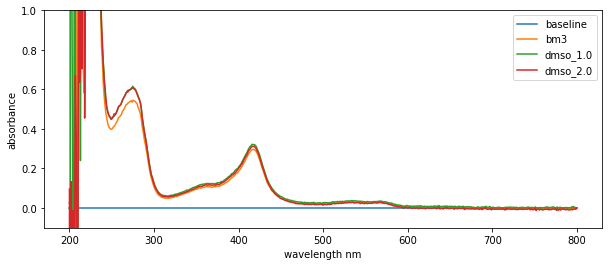

In [19]:
import matplotlib.pyplot as plt # alias

plt.figure(figsize=(10,4)) # optional, change default figure paramaters, e.g. size

plt.plot(df['baseline']) # index assumed to be x axis
plt.plot(df['bm3'])
plt.plot(df['dmso_1.0'])
plt.plot(df['dmso_2.0'])

plt.legend(df.columns[:4]) # specify some legend labels, also takes lists
plt.xlabel('wavelength nm')
plt.ylabel('absorbance')
plt.ylim(-0.1,1)
plt.show()

# Exercise - build a function to plot all traces
### Specifications
- Must plot all traces - and work for new data with more or fewer traces.
- Y-axis must be scaled to accomodate the absorbance peak at 280 nm
- X-axis must be scaled to clip the mess between 200 and 250 nm
- Must have a title! Something like: UV-Vis absorbance of P450 BM3 (wild-type) with increasing concentrations of arachadionic acid (preferably more succinct)
- Axes must be labeled
- ideally, there should be a legend (extra points)

# 3. todo: extracting the compound concentrations
1. extract columns that contain ```"Arachadonic_acid"```
2. from those, extract numbers 
3. change number datatype from ```str``` to ```float```
4. dilution calculation

In [21]:
import re

def substrate_vols(idx):
    substrate = [i for i in idx if 'Arachadonic_acid' in i]
    regex = [re.findall('\d+.\d+', i) for i in substrate] # add some cheat sheet cmds
    vols = [float(i[0]) for i in regex]
    return vols

vols = substrate_vols(df.index)
vols

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

## 3.1 todo: calculate substrate concentration
Make a function that calculates the final concentration of the substrate using
```c1*v1=c2*v2```
given that the final volume is 1ml, the stock concentration is 10 mM and the additions are measured in µl.

# 4. todo: plotting 2 - colormaps and subplots 

# 5, todo: quantify Soret band shift and Michaelis-Menten curve fitting

*fact: this P450 responds mildly to DMSO, so procedure is to saturate the enzyme with DMSO (until is stops shifting) before adding test compound. This accounts for the columns ```'dmso_1.0'``` and ```dmso_2.0'```*